# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تخمین حالت بدن با OpenPose در Opencv</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مقاله‌ی</div>

[Realtime Multi-Person 2D Pose Estimation using Part Affinity Fields](https://openaccess.thecvf.com/content_cvpr_2017/papers/Cao_Realtime_Multi-Person_2D_CVPR_2017_paper.pdf)
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">در سال 2017 و با روش یادگیری عمیق چاپ شده که در گیت این مقاله مدل Caffe آپلود شده است!</div>

[Models](https://github.com/CMU-Perceptual-Computing-Lab/openpose/tree/master/models/pose/mpi)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد نیاز</div>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مدل</div>

In [2]:
protoFile = "model/caffe/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "model/caffe/pose_iter_160000.caffemodel"

In [3]:
nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

# Read Image

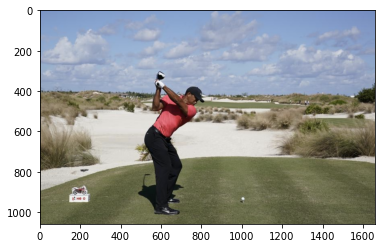

In [4]:
image = cv2.imread("images/Tiger_Woods.png")
height, width, _ = image.shape
plt.imshow(image[...,::-1]);

# Convert image to blob

In [5]:
blob = cv2.dnn.blobFromImage(image, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
net.setInput(blob)

# Run Inference (forward pass)

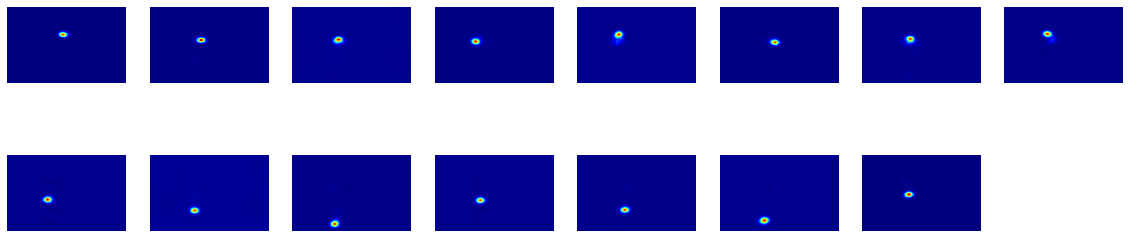

In [6]:
# Forward Pass
output = net.forward()

# Display probability maps
plt.figure(figsize=(20,5))
for i in range(nPoints):
    probMap = output[0, i, :, :]
    displayMap = cv2.resize(probMap, (width, height), cv2.INTER_LINEAR)
    plt.subplot(2, 8, i+1); plt.axis('off'); plt.imshow(displayMap, cmap='jet')

# Extract points

In [7]:
# X and Y Scale
scaleX = width / output.shape[3]
scaleY = height / output.shape[2]

# Empty list to store the detected keypoints
points = []

# Treshold 
threshold = 0.1

for i in range(nPoints):
    # Obtain probability map
    probMap = output[0, i, :, :]
    
    # Find global maxima of the probMap.
    _, prob, _, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = scaleX * point[0]
    y = scaleY * point[1]

    if prob > threshold : 
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)


# Display Points & Skeleton

In [8]:
imPoints = image.copy()
imSkeleton = image.copy()
# Draw points
for i, p in enumerate(points):
    cv2.circle(imPoints, p, 8, (255, 255,0), thickness=-1, lineType=cv2.FILLED)
    cv2.putText(imPoints, "{}".format(i), p, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, lineType=cv2.LINE_AA)

# Draw skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(imSkeleton, points[partA], points[partB], (255, 255,0), 2)
        cv2.circle(imSkeleton, points[partA], 8, (255, 0, 0), thickness=-1, lineType=cv2.FILLED)

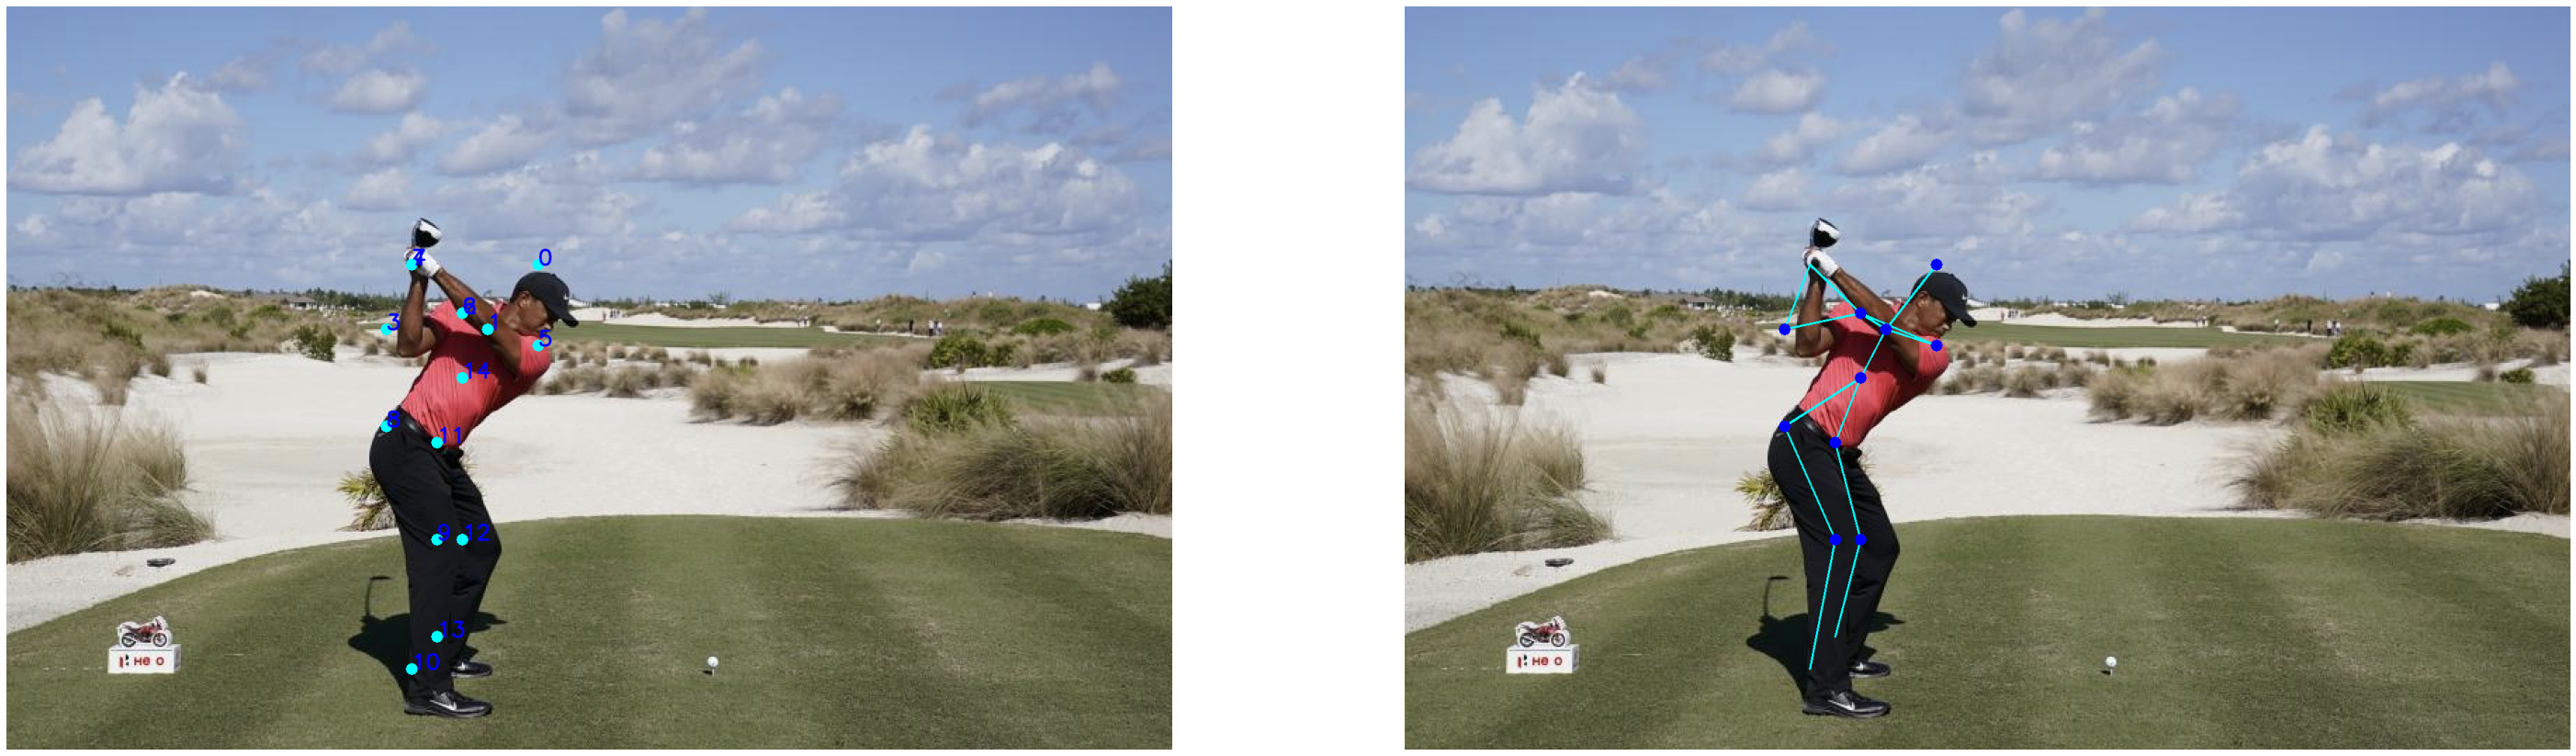

In [9]:
plt.figure(figsize=(50,50))
plt.subplot(121); plt.axis('off'); plt.imshow(imPoints[...,::-1]);
plt.subplot(122); plt.axis('off'); plt.imshow(imSkeleton[...,::-1]);

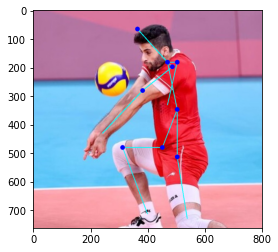

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("images/volleyball.jpg")

protoFile = "model/caffe/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "model/caffe/pose_iter_160000.caffemodel"

nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

# Load model and Forward Pass
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
blob = cv2.dnn.blobFromImage(image, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
net.setInput(blob)
output = net.forward()

# X and Y Scale
height, width, _ = image.shape
scaleX = width / output.shape[3]
scaleY = height / output.shape[2]

# Empty list to store the detected keypoints
points = []

# Treshold 
threshold = 0.1

for i in range(nPoints):
    # Obtain probability map
    probMap = output[0, i, :, :]
    
    # Find global maxima of the probMap.
    _, prob, _, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = scaleX * point[0]
    y = scaleY * point[1]

    if prob > threshold : 
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw skeleton
imSkeleton = image.copy()
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(imSkeleton, points[partA], points[partB], (255, 255,0), 2)
        cv2.circle(imSkeleton, points[partA], 8, (255, 0, 0), thickness=-1, lineType=cv2.FILLED)

plt.imshow(imSkeleton[...,::-1]);

https://learnopencv.com/deep-learning-based-human-pose-estimation-using-opencv-cpp-python/